In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame as DF

%matplotlib inline

In [2]:
pi = np.pi
log = np.log
exp = np.exp
sqrt = np.sqrt
sin = np.sin
arcsin = np.arcsin
sinh = np.sinh
cos = np.cos
tan = np.tan
arctan = np.arctan
tanh = np.tanh
arctanh = np.arctanh

# Chapter 6<br>Ordinary Differential Equations

## 6.4 Runge-Kutta Methods and Applications

In [3]:
def Midpoint_method(f, a, b, h, y_0):
    n = int((b - a)/h)
    d = len(y_0)
    
    t = np.linspace(a, b, n+1)
    w = np.zeros((d, n+1))
    w[:, 0] = y_0
    
    for i in range(n):
        w[:, i+1] = w[:, i] + h*f(t[i] + h/2, w[:, i] + f(t[i], w[:, i])*h/2)
        
    return t, w

In [4]:
def RK4(f, a, b, h, y_0):
    n = int((b - a)/h)
    d = len(y_0)
    
    t = np.linspace(a, b, n+1)
    w = np.zeros((d, n+1))
    w[:, 0] = y_0
    
    for i in range(n):
        s_1 = f(t[i], w[:, i])
        s_2 = f(t[i] + h/2, w[:, i] + s_1*h/2)
        s_3 = f(t[i] + h/2, w[:, i] + s_2*h/2)
        s_4 = f(t[i] + h, w[:, i] + s_3*h)        
        
        w[:, i+1] = w[:, i] + (s_1 + 2*s_2 + 2*s_3 + s_4)*h/6
        
    return t, w

### Q. 1

In [5]:
a, b = 0, 1
h = 0.1
y_0 = [1]

In [6]:
# (a)
def f(t, y):
    return t

def exact_sol(t):
    return (t**2)/2 + 1

In [7]:
t, w = Midpoint_method(f, a, b, h, y_0)
true_value = exact_sol(t)
error = abs(true_value - w[0])

DF({"t": t, "w": w[0], "Error": error, 'True value': true_value}).set_index('t')[['True value', 'w', 'Error']]

,True value,w,Error
t,,,
0.0,1.000,1.000,0.000000e+00
0.1,1.005,1.005,0.000000e+00
0.2,1.020,1.020,2.220446e-16
0.3,1.045,1.045,2.220446e-16
0.4,1.080,1.080,4.440892e-16
0.5,1.125,1.125,4.440892e-16
0.6,1.180,1.180,6.661338e-16
0.7,1.245,1.245,6.661338e-16
0.8,1.320,1.320,6.661338e-16


In [8]:
# (b)
def f(t, y):
    return (t**2)*y

def exact_sol(t):
    return exp((t**3)/3)

In [9]:
t, w = Midpoint_method(f, a, b, h, y_0)
true_value = exact_sol(t)
error = abs(true_value - w[0])

DF({"t": t, "w": w[0], "Error": error, 'True value': true_value}).set_index('t')[['True value', 'w', 'Error']]

,True value,w,Error
t,,,
0.0,1.000000,1.000000,0.000000
0.1,1.000333,1.000250,0.000083
0.2,1.002670,1.002502,0.000169
0.3,1.009041,1.008780,0.000261
0.4,1.021563,1.021193,0.000369
0.5,1.042547,1.042038,0.000509
0.6,1.074655,1.073953,0.000702
0.7,1.121126,1.120145,0.000981
0.8,1.186095,1.184696,0.001399


In [10]:
# (c)
def f(t, y):
    return 2*(t + 1)*y

def exact_sol(t):
    return exp((t+1)**2 - 1)

In [11]:
t, w = Midpoint_method(f, a, b, h, y_0)
true_value = exact_sol(t)
error = abs(true_value - w[0])

DF({"t": t, "w": w[0], "Error": error, 'True value': true_value}).set_index('t')[['True value', 'w', 'Error']]

,True value,w,Error
t,,,
0.0,1.000000,1.000000,0.000000
0.1,1.233678,1.231000,0.002678
0.2,1.552707,1.545274,0.007433
0.3,1.993716,1.977951,0.015764
0.4,2.611696,2.581424,0.030272
0.5,3.490343,3.434843,0.055500
0.6,4.758821,4.659364,0.099457
0.7,6.619369,6.442969,0.176400
0.8,9.393331,9.081365,0.311967


In [12]:
# (d)
def f(t, y):
    return 5*(t**4)*y

def exact_sol(t):
    return exp(t**5)

In [13]:
t, w = Midpoint_method(f, a, b, h, y_0)
true_value = exact_sol(t)
error = abs(true_value - w[0])

DF({"t": t, "w": w[0], "Error": error, 'True value': true_value}).set_index('t')[['True value', 'w', 'Error']]

,True value,w,Error
t,,,
0.0,1.000000,1.000000,0.000000
0.1,1.000010,1.000003,0.000007
0.2,1.000320,1.000256,0.000064
0.3,1.002433,1.002211,0.000222
0.4,1.010293,1.009746,0.000547
0.5,1.031743,1.030581,0.001162
0.6,1.080863,1.078470,0.002393
0.7,1.183019,1.177846,0.005174
0.8,1.387745,1.375370,0.012375


In [14]:
# (e)
def f(t, y):
    return y**(-2)

def exact_sol(t):
    return (3*t + 1)**(1/3)

In [15]:
t, w = Midpoint_method(f, a, b, h, y_0)
true_value = exact_sol(t)
error = abs(true_value - w[0])

DF({"t": t, "w": w[0], "Error": error, 'True value': true_value}).set_index('t')[['True value', 'w', 'Error']]

,True value,w,Error
t,,,
0.0,1.000000,1.000000,0.000000
0.1,1.091393,1.090703,0.000690
0.2,1.169607,1.168640,0.000967
0.3,1.238562,1.237481,0.001081
0.4,1.300591,1.299468,0.001123
0.5,1.357209,1.356079,0.001130
0.6,1.409460,1.408341,0.001119
0.7,1.458100,1.457001,0.001098
0.8,1.503695,1.502621,0.001074


In [16]:
# (f)
def f(t, y):
    return t**3 / y**2

def exact_sol(t):
    return (0.75*(t**4) + 1)**(1/3)

In [17]:
t, w = Midpoint_method(f, a, b, h, y_0)
true_value = exact_sol(t)
error = abs(true_value - w[0])

DF({"t": t, "w": w[0], "Error": error, 'True value': true_value}).set_index('t')[['True value', 'w', 'Error']]

,True value,w,Error
t,,,
0.0,1.000000,1.000000,0.000000
0.1,1.000025,1.000012,0.000012
0.2,1.000400,1.000350,0.000050
0.3,1.002021,1.001910,0.000111
0.4,1.006359,1.006170,0.000190
0.5,1.015387,1.015115,0.000272
0.6,1.031403,1.031069,0.000334
0.7,1.056744,1.056400,0.000344
0.8,1.093404,1.093127,0.000277


### Q. 2

In [18]:
a, b = 0, 1
h = 0.1
y_0 = [1]

In [19]:
# (a)
def f(t, y):
    return t

def exact_sol(t):
    return (t**2)/2 + 1

In [20]:
t, w = RK4(f, a, b, h, y_0)
true_value = exact_sol(t)
error = abs(true_value - w[0])

DF({"t": t, "w": w[0], "Error": error, 'True value': true_value}).set_index('t')[['True value', 'w', 'Error']]

,True value,w,Error
t,,,
0.0,1.000,1.000,0.000000e+00
0.1,1.005,1.005,0.000000e+00
0.2,1.020,1.020,2.220446e-16
0.3,1.045,1.045,2.220446e-16
0.4,1.080,1.080,4.440892e-16
0.5,1.125,1.125,4.440892e-16
0.6,1.180,1.180,6.661338e-16
0.7,1.245,1.245,6.661338e-16
0.8,1.320,1.320,6.661338e-16


In [21]:
# (b)
def f(t, y):
    return (t**2)*y

def exact_sol(t):
    return exp((t**3)/3)

In [22]:
t, w = RK4(f, a, b, h, y_0)
true_value = exact_sol(t)
error = abs(true_value - w[0])

DF({"t": t, "w": w[0], "Error": error, 'True value': true_value}).set_index('t')[['True value', 'w', 'Error']]

,True value,w,Error
t,,,
0.0,1.000000,1.000000,0.000000e+00
0.1,1.000333,1.000333,3.473187e-09
0.2,1.002670,1.002670,6.962984e-09
0.3,1.009041,1.009041,1.051912e-08
0.4,1.021563,1.021563,1.426297e-08
0.5,1.042547,1.042547,1.849884e-08
0.6,1.074655,1.074655,2.402357e-08
0.7,1.121126,1.121126,3.299039e-08
0.8,1.186095,1.186095,5.128980e-08


In [23]:
# (c)
def f(t, y):
    return 2*(t + 1)*y

def exact_sol(t):
    return exp((t+1)**2 - 1)

In [24]:
t, w = RK4(f, a, b, h, y_0)
true_value = exact_sol(t)
error = abs(true_value - w[0])

DF({"t": t, "w": w[0], "Error": error, 'True value': true_value}).set_index('t')[['True value', 'w', 'Error']]

,True value,w,Error
t,,,
0.0,1.000000,1.000000,0.000000
0.1,1.233678,1.233674,0.000004
0.2,1.552707,1.552695,0.000012
0.3,1.993716,1.993687,0.000029
0.4,2.611696,2.611633,0.000063
0.5,3.490343,3.490211,0.000132
0.6,4.758821,4.758552,0.000270
0.7,6.619369,6.618827,0.000541
0.8,9.393331,9.392252,0.001079


In [25]:
# (d)
def f(t, y):
    return 5*(t**4)*y

def exact_sol(t):
    return exp(t**5)

In [26]:
t, w = RK4(f, a, b, h, y_0)
true_value = exact_sol(t)
error = abs(true_value - w[0])

DF({"t": t, "w": w[0], "Error": error, 'True value': true_value}).set_index('t')[['True value', 'w', 'Error']]

,True value,w,Error
t,,,
0.0,1.000000,1.000000,0.000000e+00
0.1,1.000010,1.000010,4.166443e-07
0.2,1.000320,1.000321,8.319322e-07
0.3,1.002433,1.002434,1.238971e-06
0.4,1.010293,1.010294,1.621918e-06
0.5,1.031743,1.031745,1.952405e-06
0.6,1.080863,1.080865,2.165436e-06
0.7,1.183019,1.183021,1.944933e-06
0.8,1.387745,1.387744,1.205333e-06


In [27]:
# (e)
def f(t, y):
    return y**(-2)

def exact_sol(t):
    return (3*t + 1)**(1/3)

In [28]:
t, w = RK4(f, a, b, h, y_0)
true_value = exact_sol(t)
error = abs(true_value - w[0])

DF({"t": t, "w": w[0], "Error": error, 'True value': true_value}).set_index('t')[['True value', 'w', 'Error']]

,True value,w,Error
t,,,
0.0,1.000000,1.000000,0.000000e+00
0.1,1.091393,1.091394,1.085943e-06
0.2,1.169607,1.169608,1.296122e-06
0.3,1.238562,1.238564,1.297085e-06
0.4,1.300591,1.300593,1.242365e-06
0.5,1.357209,1.357210,1.175241e-06
0.6,1.409460,1.409461,1.109097e-06
0.7,1.458100,1.458101,1.047970e-06
0.8,1.503695,1.503696,9.927255e-07


In [29]:
# (f)
def f(t, y):
    return t**3 / y**2

def exact_sol(t):
    return (0.75*(t**4) + 1)**(1/3)

In [30]:
t, w = RK4(f, a, b, h, y_0)
true_value = exact_sol(t)
error = abs(true_value - w[0])

DF({"t": t, "w": w[0], "Error": error, 'True value': true_value}).set_index('t')[['True value', 'w', 'Error']]

,True value,w,Error
t,,,
0.0,1.000000,1.000000,0.000000e+00
0.1,1.000025,1.000025,1.562375e-10
0.2,1.000400,1.000400,1.564492e-09
0.3,1.002021,1.002021,5.652155e-09
0.4,1.006359,1.006359,1.561860e-08
0.5,1.015387,1.015387,4.206078e-08
0.6,1.031403,1.031404,1.124073e-07
0.7,1.056744,1.056744,2.730486e-07
0.8,1.093404,1.093405,5.658170e-07


### Q. 3

In [31]:
a, b = 0, 1
y_0 = [1]

In [32]:
# (a)
def f(t, y):
    return t

def exact_sol(t):
    return (t**2)/2 + 1

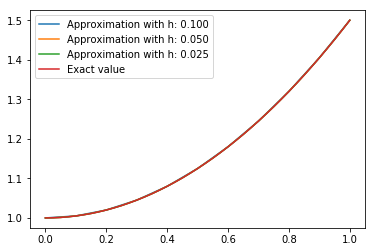

In [33]:
for h in (0.1, 0.05, 0.025):
    t, w = RK4(f, a, b, h, y_0)
    plt.plot(t, w[0], label="Approximation with h: %.3f" % h)

true_value = exact_sol(t)
plt.plot(t, true_value, label="Exact value")
plt.legend()

plt.show()

In [34]:
# (b)
def f(t, y):
    return (t**2)*y

def exact_sol(t):
    return exp((t**3)/3)

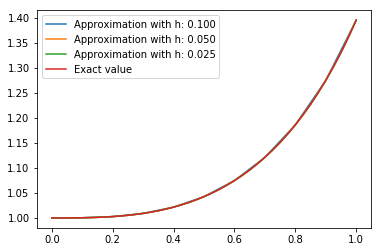

In [35]:
for h in (0.1, 0.05, 0.025):
    t, w = RK4(f, a, b, h, y_0)
    plt.plot(t, w[0], label="Approximation with h: %.3f" % h)

true_value = exact_sol(t)
plt.plot(t, true_value, label="Exact value")
plt.legend()

plt.show()

In [36]:
# (c)
def f(t, y):
    return 2*(t + 1)*y

def exact_sol(t):
    return exp((t+1)**2 - 1)

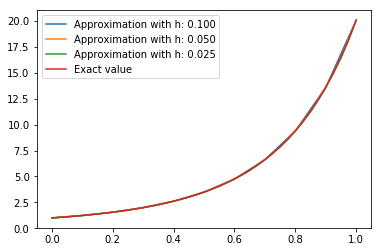

In [37]:
for h in (0.1, 0.05, 0.025):
    t, w = RK4(f, a, b, h, y_0)
    plt.plot(t, w[0], label="Approximation with h: %.3f" % h)

true_value = exact_sol(t)
plt.plot(t, true_value, label="Exact value")
plt.legend()

plt.show()

In [38]:
# (d)
def f(t, y):
    return 5*(t**4)*y

def exact_sol(t):
    return exp(t**5)

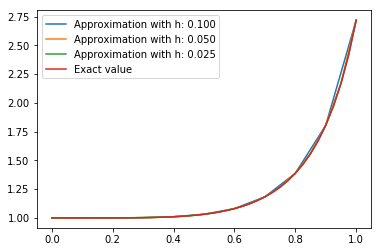

In [39]:
for h in (0.1, 0.05, 0.025):
    t, w = RK4(f, a, b, h, y_0)
    plt.plot(t, w[0], label="Approximation with h: %.3f" % h)

true_value = exact_sol(t)
plt.plot(t, true_value, label="Exact value")
plt.legend()

plt.show()

In [40]:
# (e)
def f(t, y):
    return y**(-2)

def exact_sol(t):
    return (3*t + 1)**(1/3)

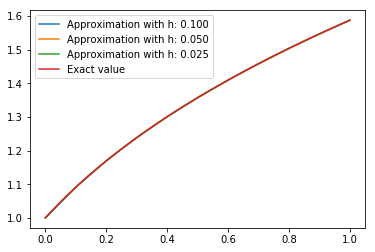

In [41]:
for h in (0.1, 0.05, 0.025):
    t, w = RK4(f, a, b, h, y_0)
    plt.plot(t, w[0], label="Approximation with h: %.3f" % h)

true_value = exact_sol(t)
plt.plot(t, true_value, label="Exact value")
plt.legend()

plt.show()

In [42]:
# (f)
def f(t, y):
    return t**3 / y**2

def exact_sol(t):
    return (0.75*(t**4) + 1)**(1/3)

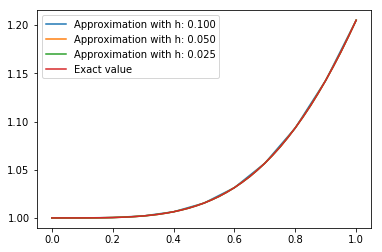

In [43]:
for h in (0.1, 0.05, 0.025):
    t, w = RK4(f, a, b, h, y_0)
    plt.plot(t, w[0], label="Approximation with h: %.3f" % h)

true_value = exact_sol(t)
plt.plot(t, true_value, label="Exact value")
plt.legend()

plt.show()

### Q. 4

In [44]:
a, b = 0, 1
h = 0.1
y_0 = [0]

In [45]:
# (a)
def f(t, y):
    return t + y

def exact_sol(t):
    return exp(t) - t - 1

In [46]:
t, w = RK4(f, a, b, h, y_0)
true_value = exact_sol(t)
error = abs(true_value - w[0])

DF({"t": t, "w": w[0], "Error": error, 'True value': true_value}).set_index('t')[['True value', 'w', 'Error']]

,True value,w,Error
t,,,
0.0,0.000000,0.000000,0.000000e+00
0.1,0.005171,0.005171,8.474231e-08
0.2,0.021403,0.021403,1.873095e-07
0.3,0.049859,0.049858,3.105135e-07
0.4,0.091825,0.091824,4.575606e-07
0.5,0.148721,0.148721,6.321033e-07
0.6,0.222119,0.222118,8.382986e-07
0.7,0.313753,0.313752,1.080874e-06
0.8,0.425541,0.425540,1.365200e-06


In [47]:
# (b)
def f(t, y):
    return t - y

def exact_sol(t):
    return exp(-t) + t - 1

In [48]:
t, w = RK4(f, a, b, h, y_0)
true_value = exact_sol(t)
error = abs(true_value - w[0])

DF({"t": t, "w": w[0], "Error": error, 'True value': true_value}).set_index('t')[['True value', 'w', 'Error']]

,True value,w,Error
t,,,
0.0,0.000000,0.000000,0.000000e+00
0.1,0.004837,0.004838,8.196404e-08
0.2,0.018731,0.018731,1.483283e-07
0.3,0.040818,0.040818,2.013195e-07
0.4,0.070320,0.070320,2.428819e-07
0.5,0.106531,0.106531,2.747107e-07
0.6,0.148812,0.148812,2.982823e-07
0.7,0.196585,0.196586,3.148798e-07
0.8,0.249329,0.249329,3.256172e-07


In [49]:
# (c)
def f(t, y):
    return 4*t - 2*y

def exact_sol(t):
    return exp(-2*t) + 2*t - 1

In [50]:
t, w = RK4(f, a, b, h, y_0)
true_value = exact_sol(t)
error = abs(true_value - w[0])

DF({"t": t, "w": w[0], "Error": error, 'True value': true_value}).set_index('t')[['True value', 'w', 'Error']]

,True value,w,Error
t,,,
0.0,0.000000,0.000000,0.000000
0.1,0.018731,0.018733,0.000003
0.2,0.070320,0.070324,0.000004
0.3,0.148812,0.148817,0.000005
0.4,0.249329,0.249335,0.000006
0.5,0.367879,0.367885,0.000006
0.6,0.501194,0.501200,0.000006
0.7,0.646597,0.646602,0.000005
0.8,0.801897,0.801902,0.000005


### Q. 5

In [51]:
a, b = 0, 1

def f(t, y):
    return 1 + y**2

In [52]:
# (a)
y_0 = [0]

def exact_sol(t):
    return tan(t)

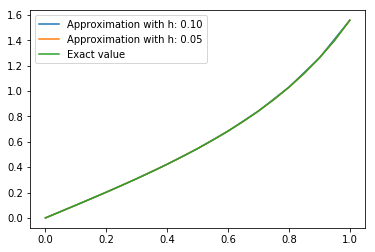

In [53]:
for h in (0.1, 0.05):
    t, w = RK4(f, a, b, h, y_0)
    plt.plot(t, w[0], label="Approximation with h: %.2f" % h)

true_value = exact_sol(t)
plt.plot(t, true_value, label="Exact value")
plt.legend()

plt.show()

In [54]:
# (b)
y_0 = [1]

def exact_sol(t):
    return tan(t + pi/4)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.


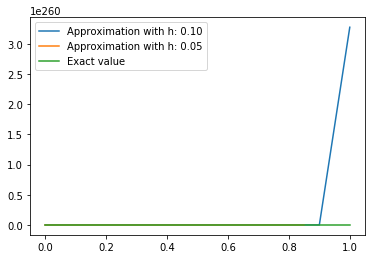

In [55]:
for h in (0.1, 0.05):
    t, w = RK4(f, a, b, h, y_0)
    plt.plot(t, w[0], label="Approximation with h: %.2f" % h)

true_value = exact_sol(t)
plt.plot(t, true_value, label="Exact value")
plt.legend()

plt.show()

### Q. 6

In [56]:
a, b = 0, 1

def f(t, y):
    return 1 - y**2

In [57]:
# (a)
y_0 = [0]

def exact_sol(t):
    return tanh(t)

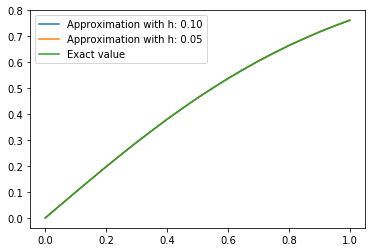

In [58]:
for h in (0.1, 0.05):
    t, w = RK4(f, a, b, h, y_0)
    plt.plot(t, w[0], label="Approximation with h: %.2f" % h)

true_value = exact_sol(t)
plt.plot(t, true_value, label="Exact value")
plt.legend()

plt.show()

In [59]:
# (b)
y_0 = [-1/2]

def exact_sol(t):
    c = -log(3)/2
    return tanh(t + c)

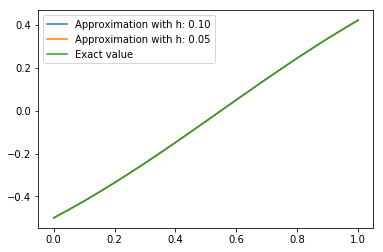

In [60]:
for h in (0.1, 0.05):
    t, w = RK4(f, a, b, h, y_0)
    plt.plot(t, w[0], label="Approximation with h: %.2f" % h)

true_value = exact_sol(t)
plt.plot(t, true_value, label="Exact value")
plt.legend()

plt.show()

### Q. 7

In [61]:
a, b = 0, 4

def f(t, y):
    return sin(y)

In [62]:
# (a)
y_0 = [0]

def exact_sol(t):
    return 2*arctan(exp(t)*tan(y_0[0]/2)) + 2*pi*int((y_0[0] + pi)/(2*pi))

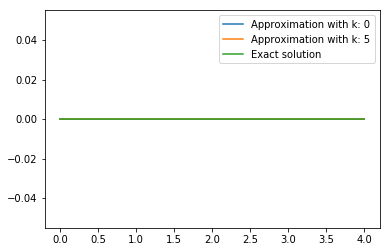

In [63]:
for k in (0, 5):
    h = 0.1 * 2**(-k)
    t, w = RK4(f, a, b, h, y_0)
    plt.plot(t, w[0], label="Approximation with k: %d" % k)

true_value = exact_sol(t)
plt.plot(t, true_value, label="Exact solution")
plt.legend()

plt.show()

C:\Anaconda3\lib\site-packages\matplotlib\ticker.py:2210: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


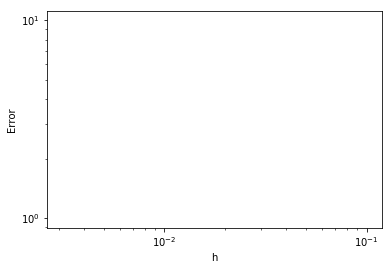

In [64]:
h_list = [0.1 * 2**(-k) for k in range(6)]
error_list = []

for h in h_list:
    t, w = RK4(f, a, b, h, y_0)
    error = abs(true_value[-1] - w[0, -1])
    error_list.append(error)
# All the errors for different h's are exactly zero.
# Therefore, we cannot plot a log-log error graph.

plt.plot(h_list, error_list)
plt.xlabel('h')
plt.ylabel("Error")
plt.xscale("log")
plt.yscale("log")
plt.legend()

plt.show()

In [65]:
# (b)
y_0 = [100]

def exact_sol(t):
    return 2*arctan(exp(t)*tan(y_0[0]/2)) + 2*pi*int((y_0[0] + pi)/(2*pi))

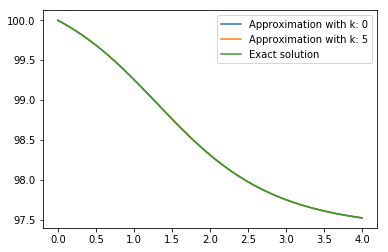

In [66]:
for k in (0, 5):
    h = 0.1 * 2**(-k)
    t, w = RK4(f, a, b, h, y_0)
    plt.plot(t, w[0], label="Approximation with k: %d" % k)

true_value = exact_sol(t)
plt.plot(t, true_value, label="Exact solution")
plt.legend()

plt.show()

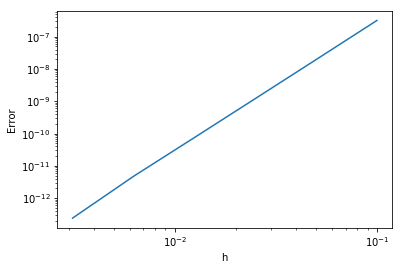

In [67]:
h_list = [0.1 * 2**(-k) for k in range(6)]
error_list = []

for h in h_list:
    t, w = RK4(f, a, b, h, y_0)
    error = abs(true_value[-1] - w[0, -1])
    error_list.append(error)

plt.plot(h_list, error_list)
plt.xlabel('h')
plt.ylabel("Error")
plt.xscale("log")
plt.yscale("log")
plt.legend()

plt.show()

### Q. 8

In [68]:
def f(t, y):
    return sinh(y)

In [69]:
# (a)
a, b = 0, 2
y_0 = [1/4]

def exact_sol(t):
    return 2*arctanh(exp(t)*tanh(y_0[0]/2))

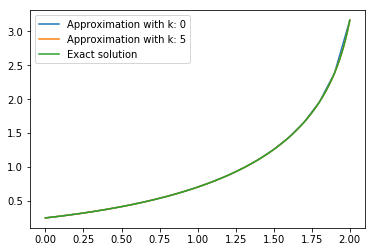

In [70]:
for k in (0, 5):
    h = 0.1 * 2**(-k)
    t, w = RK4(f, a, b, h, y_0)
    plt.plot(t, w[0], label="Approximation with k: %d" % k)

true_value = exact_sol(t)
plt.plot(t, true_value, label="Exact solution")
plt.legend()

plt.show()

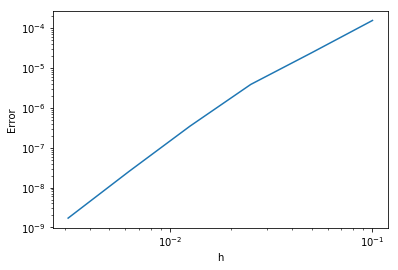

In [71]:
h_list = [0.1 * 2**(-k) for k in range(6)]
error_list = []

for h in h_list:
    t, w = RK4(f, a, b, h, y_0)
    error = abs(true_value[-1] - w[0, -1])
    error_list.append(error)

plt.plot(h_list, error_list)
plt.xlabel('h')
plt.ylabel("Error")
plt.xscale("log")
plt.yscale("log")
plt.legend()

plt.show()

In [72]:
# (b)
a, b = 0, 1/4
y_0 = [2]

def exact_sol(t):
    return 2*arctanh(exp(t)*tanh(y_0[0]/2))

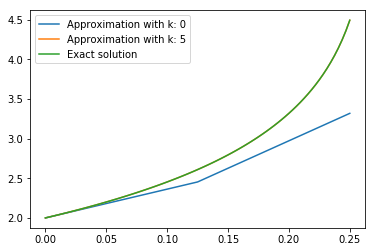

In [73]:
for k in (0, 5):
    h = 0.1 * 2**(-k)
    t, w = RK4(f, a, b, h, y_0)
    plt.plot(t, w[0], label="Approximation with k: %d" % k)

true_value = exact_sol(t)
plt.plot(t, true_value, label="Exact solution")
plt.legend()

plt.show()

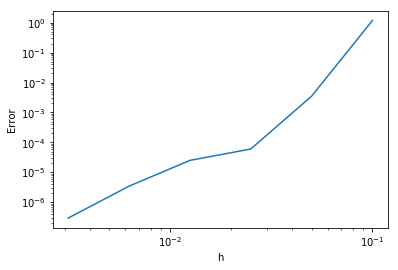

In [74]:
h_list = [0.1 * 2**(-k) for k in range(6)]
error_list = []

for h in h_list:
    t, w = RK4(f, a, b, h, y_0)
    error = abs(true_value[-1] - w[0, -1])
    error_list.append(error)

plt.plot(h_list, error_list)
plt.xlabel('h')
plt.ylabel("Error")
plt.xscale("log")
plt.yscale("log")
plt.legend()

plt.show()

### Q. 9

In [75]:
a, b = 0, 1
h_list = [0.2 * 2**(-k) for k in range(8)]
y_0 = [1]

In [76]:
# (a)
def f(t, y):
    return t

def exact_sol(t):
    return (t**2)/2 + 1

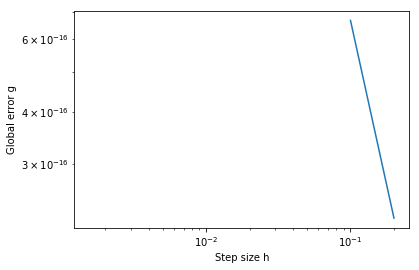

In [77]:
error_list = []

for h in h_list:
    t, w = RK4(f, a, b, h, y_0)
    error = abs(exact_sol(1) - w[0, -1])
    error_list.append(error)

plt.plot(h_list, error_list)
plt.xlabel("Step size h")
plt.ylabel("Global error g")
plt.xscale("log")
plt.yscale("log")
plt.legend()

plt.show()

In [78]:
# (b)
def f(t, y):
    return (t**2)*y

def exact_sol(t):
    return exp((t**3)/3)

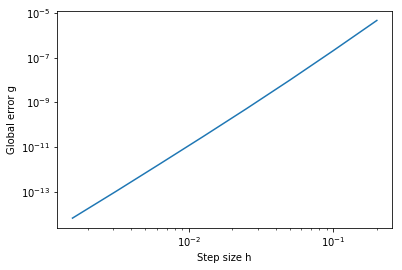

In [79]:
error_list = []

for h in h_list:
    t, w = RK4(f, a, b, h, y_0)
    error = abs(exact_sol(1) - w[0, -1])
    error_list.append(error)

plt.plot(h_list, error_list)
plt.xlabel("Step size h")
plt.ylabel("Global error g")
plt.xscale("log")
plt.yscale("log")
plt.legend()

plt.show()

In [80]:
# (c)
def f(t, y):
    return 2*(t + 1)*y

def exact_sol(t):
    return exp((t+1)**2 - 1)

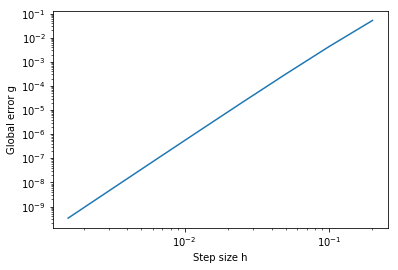

In [81]:
error_list = []

for h in h_list:
    t, w = RK4(f, a, b, h, y_0)
    error = abs(exact_sol(1) - w[0, -1])
    error_list.append(error)

plt.plot(h_list, error_list)
plt.xlabel("Step size h")
plt.ylabel("Global error g")
plt.xscale("log")
plt.yscale("log")
plt.legend()

plt.show()

In [82]:
# (d)
def f(t, y):
    return 5*(t**4)*y

def exact_sol(t):
    return exp(t**5)

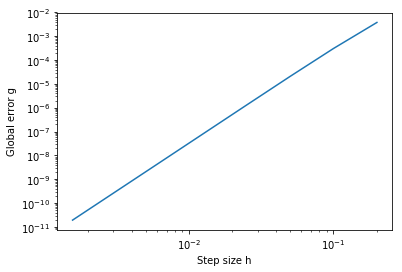

In [83]:
error_list = []

for h in h_list:
    t, w = RK4(f, a, b, h, y_0)
    error = abs(exact_sol(1) - w[0, -1])
    error_list.append(error)

plt.plot(h_list, error_list)
plt.xlabel("Step size h")
plt.ylabel("Global error g")
plt.xscale("log")
plt.yscale("log")
plt.legend()

plt.show()

In [84]:
# (e)
def f(t, y):
    return y**(-2)

def exact_sol(t):
    return (3*t + 1)**(1/3)

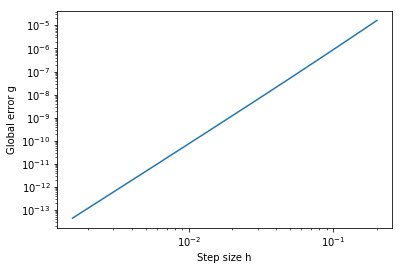

In [85]:
error_list = []

for h in h_list:
    t, w = RK4(f, a, b, h, y_0)
    error = abs(exact_sol(1) - w[0, -1])
    error_list.append(error)

plt.plot(h_list, error_list)
plt.xlabel("Step size h")
plt.ylabel("Global error g")
plt.xscale("log")
plt.yscale("log")
plt.legend()

plt.show()

In [86]:
# (f)
def f(t, y):
    return t**3 / y**2

def exact_sol(t):
    return (0.75*(t**4) + 1)**(1/3)

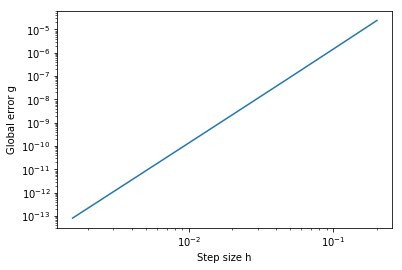

In [87]:
error_list = []

for h in h_list:
    t, w = RK4(f, a, b, h, y_0)
    error = abs(exact_sol(1) - w[0, -1])
    error_list.append(error)

plt.plot(h_list, error_list)
plt.xlabel("Step size h")
plt.ylabel("Global error g")
plt.xscale("log")
plt.yscale("log")
plt.legend()

plt.show()

### Q. 10

In [88]:
def Hodgkin_Huxley(t, y):
    v, m, n, h = y
    C = 1
    g1, g2, g3 = 120, 36, 0.3
    E0, E1, E2, E3 = -65, 50, -77, -54.4
    I_in = 7
    
    def a_m(v):
        return (2.5 - 0.1*v) / (exp(2.5 - 0.1*v) - 1)
    def b_m(v):
        return 4*exp(-v/18)
    def a_n(v):
        return (0.1 - 0.01*v) / (exp(1 - 0.1*v) - 1)
    def b_n(v):
        return exp(-v/80) / 8
    def a_h(v):
        return 0.07*exp(-v/20)
    def b_h(v):
        return 1 / (exp(3 - 0.1*v) + 1)
    
    v_ = (-g1*m**3*h*(v - E1) - g2*n**4*(v - E2) - g3*(v - E3) + I_in) / C
    m_ = (1 - m)*a_m(v - E0) - m*b_m(v - E0)
    n_ = (1 - n)*a_n(v - E0) - n*b_n(v - E0)
    h_ = (1 - h)*a_h(v - E0) - h*b_h(v - E0)
    
    return np.array([v_, m_, n_, h_])

### Q. 11

In [105]:
a, b = 0, 50
h = 0.001
init_cond = (5, 5, 5)

def Lorenz(t, xyz):
    x, y, z = xyz
    s = 10
    r = 28
    b = 8/3
    
    x_ = -s*x + s*y
    y_ = -x*z + r*x - y
    z_ = x*y - b*z
    
    return np.array([x_, y_, z_])

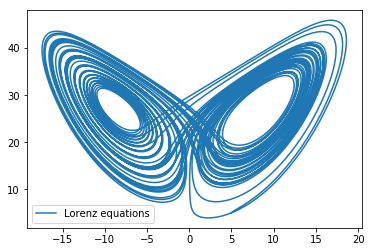

In [106]:
t, w = RK4(Lorenz, a, b, h, init_cond)

plt.plot(w[0, :], w[2, :], label="Lorenz equations")
plt.legend()

plt.show()

### Q. 12

In [116]:
a, b = 0, 20
h = 0.001

delta = 10**(-5)
init_cond1 = (5, 5, 5)
init_cond2 = (5+delta, 5, 5)

def Lorenz(t, xyz):
    x, y, z = xyz
    s = 10
    r = 28
    b = 8/3
    
    x_ = -s*x + s*y
    y_ = -x*z + r*x - y
    z_ = x*y - b*z
    
    return np.array([x_, y_, z_])

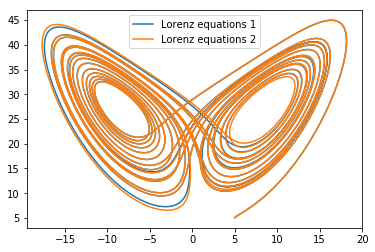

In [117]:
t, w1 = RK4(Lorenz, a, b, h, init_cond1)
t, w2 = RK4(Lorenz, a, b, h, init_cond2)

plt.plot(w1[0, :], w1[2, :], label="Lorenz equations 1")
plt.plot(w2[0, :], w2[2, :], label="Lorenz equations 2")
plt.legend()

plt.show()

In [124]:
error_10 = np.array([w1[0, 10000] - w2[0, 10000], w1[2, 10000] - w2[2, 10000]])
error_20 = np.array([w1[0, -1] - w2[0, -1], w1[2, -1] - w2[2, -1]])

print("Error after t = 10: %f" % (error_10 @ error_10))
print("Error after t = 20: %f" % (error_20 @ error_20))

Error after t = 10: 0.000001
Error after t = 20: 450.721042


### Q. 13

In [135]:
bin_seq_1 = (w1[0] > 0).astype(int)
bin_seq_2 = (w2[0] > 0).astype(int)
agreed_times = sum(bin_seq_1 == bin_seq_2)

print("The symbol sequences agree for %d times." % agreed_times)

The symbol sequences agree for 19598 times.
